#The steps to solve this challenge
![solution process](https://miro.medium.com/max/1042/1*rcMiwJlFakqI7bzaqintrQ.png)\
[Ayşe Bat, medium.com]


In [0]:
import torch
from torch import nn
import torch.nn.functional as F
import torchvision

import matplotlib.pyplot as plt
import numpy as np

- Create a series of transformation to prepare the dataset :
  - Convert  numpy.ndarray (H x W x C) to a torch.FloatTensor of shape (C x H x W).
  - Normalize a tensor image with mean and standard deviation.

**- Why are `mean` and `std` set as values in `[0.0, 1.0]` while images supposed to be are matrices of `0` to `255` values ?**\
**- Why have we to give an array of `mean` and `std` values ?**


In [2]:
from torchvision import datasets, models, transforms

# here we set mean and std to 0.5
train_transform = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize(mean=[0.5,],std=[0.5,])])
test_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.5,],std=[0.5,])])

# choose the training and test datasets
train_data = datasets.MNIST('data/train', train=True,
                              download=True, transform=train_transform)
test_data = datasets.MNIST('data/test', train=False,
                             download=True, transform=test_transform)

Extracting data/train/MNIST/raw/train-images-idx3-ubyte.gz to data/train/MNIST/raw


Extracting data/train/MNIST/raw/train-labels-idx1-ubyte.gz to data/train/MNIST/raw


Extracting data/train/MNIST/raw/t10k-images-idx3-ubyte.gz to data/train/MNIST/raw


Extracting data/train/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/train/MNIST/raw
Processing...
Done!




Extracting data/test/MNIST/raw/train-images-idx3-ubyte.gz to data/test/MNIST/raw


Extracting data/test/MNIST/raw/train-labels-idx1-ubyte.gz to data/test/MNIST/raw


Extracting data/test/MNIST/raw/t10k-images-idx3-ubyte.gz to data/test/MNIST/raw


Extracting data/test/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/test/MNIST/raw
Processing...
Done!


- Visualize the data.
- Check out classes frequency distribution.

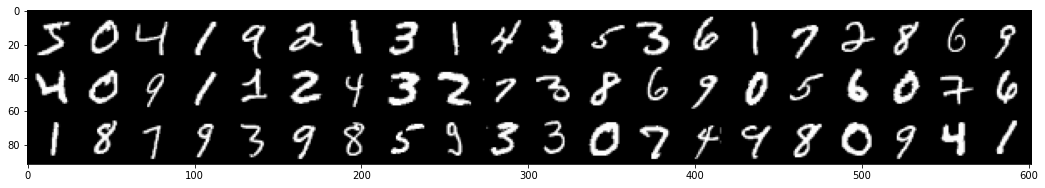

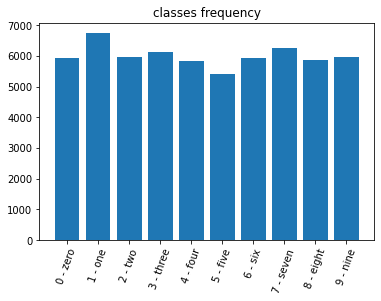

In [3]:
images = train_data.data[:60].view((-1,1,28,28))

grid = torchvision.utils.make_grid(images, nrow = 20, padding = 2)
plt.figure(figsize = (18, 18))  
plt.imshow(np.transpose(grid, (1, 2, 0)))
plt.show()

(unique, counts) = np.unique(train_data.targets.numpy(), return_counts=True)
plt.title("classes frequency")
plt.xticks(rotation=70)
plt.bar(train_data.classes, counts)
plt.show()

**- Why ´0.5´ for `mean` and `std` ?**

In [4]:
print("mean : ", train_data.data.float().mean().item()/255)
print("std : ", train_data.data.float().std().item()/255)

mean :  0.13062754612342983
std :  0.30810780244715075


- Split data into training set, validation set, and testing set.
- Set data loaders in batch configuration.

In [0]:
from torch.utils.data.sampler import SubsetRandomSampler

def get_train_val_test_loader(train_dataset,
                              test_dataset,
                              batch_size,
                              valid_size=0.2,
                              shuffle=True) :
    
    num_train = len(train_dataset)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))

    if shuffle == True:
        np.random.shuffle(indices)

    train_idx, valid_idx = indices[split:], indices[:split]

    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)

    train_loader = torch.utils.data.DataLoader(train_dataset, 
                    batch_size=batch_size, sampler=train_sampler)

    valid_loader = torch.utils.data.DataLoader(train_dataset, 
                    batch_size=batch_size, sampler=valid_sampler)


    test_loader = torch.utils.data.DataLoader(test_dataset, 
                                              batch_size=batch_size)

    return (train_loader, valid_loader, test_loader)

- Define the model architecture

In [0]:
  class NN_model(torch.nn.Module):
    def __init__(self):
        super(NN_model, self).__init__()
        
        # Inputs to hidden layer 1 linear transformation
        self.hidden1 = nn.Linear(28*28, 1024)

        # Inputs to hidden layer 2 linear transformation
        self.hidden2 = nn.Linear(1024, 256)

        # Inputs to hidden layer 2 linear transformation
        self.hidden3 = nn.Linear(256, 64)

        # Output layer
        self.output = nn.Linear(64, 10)

    def forward(self, x):
        x = x.reshape(x.size(0), -1) 
        
        # Hidden layer 1 with relu activation
        x = self.hidden1(x)
        x = F.relu(x)

        # Hidden layer 2 with relu activation
        x = self.hidden2(x)
        x = F.relu(x)
        
        # Hidden layer 3 with relu activation
        x = self.hidden3(x)
        x = F.relu(x)

        # Output layer with log softmax activation
        x = F.log_softmax(self.output(x), dim=1)
        
        return x
  


In [0]:
class CNN_Model1(torch.nn.Module):
    def __init__(self):
        super(CNN_Model1, self).__init__()

        self.conv_1 = torch.nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1) #1, 28, 28 -> 32, 14, 14
        self.conv_2 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1) #32, 14, 14 -> 64, 7, 7
        self.conv_3 = torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1) #64, 7, 7 -> 128, 3, 3

        self.max_pool2d = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.linear_1 = torch.nn.Linear(3 * 3 * 128, 64)
        self.linear_2 = torch.nn.Linear(64, 10)
        
    def forward(self, x):
        x = self.conv_1(x)
        x = F.relu(x)
        x = self.max_pool2d(x)

        x = self.conv_2(x)
        x = F.relu(x)
        x = self.max_pool2d(x)
        
        x = self.conv_3(x)
        x = F.relu(x)
        x = self.max_pool2d(x)

        x = x.reshape(x.size(0), -1)
        x = self.linear_1(x)
        x = F.relu(x)

        x = self.linear_2(x)
        x = F.log_softmax(x)

        return x


In [0]:
class CNN_Model2(torch.nn.Module):
    def __init__(self):
        super(CNN_Model2, self).__init__()

        self.conv_1 = torch.nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1) #1, 28, 28 -> 32, 14, 14
        self.conv_2 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1) #32, 14, 14 -> 64, 7, 7
        self.conv_3 = torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1) #64, 7, 7 -> 128, 3, 3

        self.avg_pool2d = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.linear_1 = torch.nn.Linear(3 * 3 * 128, 64)
        self.linear_2 = torch.nn.Linear(64, 10)
        
    def forward(self, x):
        x = self.conv_1(x)
        x = F.relu(x)
        x = self.avg_pool2d(x)

        x = self.conv_2(x)
        x = F.relu(x)
        x = self.avg_pool2d(x)
        
        x = self.conv_3(x)
        x = F.relu(x)
        x = self.avg_pool2d(x)

        x = x.reshape(x.size(0), -1)
        x = self.linear_1(x)
        x = F.relu(x)

        x = self.linear_2(x)
        x = F.log_softmax(x)

        return x


In [0]:
class CNN_Model3(torch.nn.Module):
    def __init__(self):
        super(CNN_Model3, self).__init__()

        self.conv_1 = torch.nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1) #1, 28, 28 -> 32, 14, 14
        self.conv_1_ = torch.nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=2, padding=1) #32, 14, 14 -> 32, 7, 7
        self.conv_2 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1) #32, 7, 7 -> 64, 7, 7
        self.conv_2_ = torch.nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=2, padding=1) #64, 7, 7 -> 64, 2, 2
        self.conv_3 = torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1) #64, 2, 2 -> 128, 1, 1

        self.max_pool2d = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.linear = torch.nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.conv_1(x)
        x = F.relu(x)

        x = self.conv_1_(x)
        x = F.relu(x)
        x = self.max_pool2d(x)

        x = self.conv_2(x)
        x = F.relu(x)

        x = self.conv_2_(x)
        x = F.relu(x)
        x = self.max_pool2d(x)

        x = self.conv_3(x)
        x = F.relu(x)
        x = self.max_pool2d(x)
        
        x = x.reshape(x.size(0), -1)
        x = self.linear(x)
        x = F.log_softmax(x)

        return x


- Define training function
- Define testing function

In [0]:
def train(model,
          optimizer,
          criterion,
          train_loader,
          val_loader,
          epochs):
  if (torch.cuda.is_available()):
    model.cuda()
  
  train_losses = []
  val_losses = []
  train_accs = []
  val_accs = []
  best_val_loss  = float("Inf")

  for epoch in range(epochs):
    train_loss = 0
    val_loss = 0

    model.train()
    # training
    train_accuracy = 0
    for images, labels in train_loader:

        if (torch.cuda.is_available()):
            images = images.cuda()
            labels = labels.cuda()

        optimizer.zero_grad()

        out = model(images)

        loss = criterion(out, labels)
        train_loss += loss.item()

        top_p, top_class = torch.exp(out).topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        train_accuracy += torch.mean(equals.type(torch.FloatTensor))

        loss.backward()
        optimizer.step()

    train_losses.append(train_loss / len(train_loader))
    train_accs.append(train_accuracy / len(train_loader))
    # validation
    model.eval()
    
    val_accuracy = 0
    for images, labels in val_loader:

        if (torch.cuda.is_available()):
            images = images.cuda()
            labels = labels.cuda()

        out = model(images)

        loss = criterion(out, labels)
        val_loss += loss.item()

        top_p, top_class = torch.exp(out).topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        val_accuracy += torch.mean(equals.type(torch.FloatTensor))

    val_accs.append(val_accuracy / len(val_loader))
    val_losses.append(val_loss / len(val_loader))

    print('\nEpoch: {}/{}, Train Loss: {:.8f}, Train Accuracy: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, epochs, train_loss, train_acc[-1], val_loss, val_accs[-1]))

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        print("Saving the model state dictionary for Epoch: {} with Val loss: {:.8f}".format(epoch + 1, val_loss))
        torch.save(model.state_dict(), "model.pt")
    
  plt.plot(train_losses, label='Training loss')
  plt.plot(val_losses, label='Validation loss')
  plt.xlabel('Loss')
  plt.ylabel('Epochs')
  plt.legend(frameon=False)
  plt.show()

  plt.plot(train_accs, label='Training Acc')
  plt.plot(val_accs, label='Validation Acc')
  plt.xlabel('Acc')
  plt.ylabel('Epochs')
  plt.legend(frameon=False)
  plt.show()

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.cpu().numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).cpu().numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine'] , size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

def test(model,
         test_loader):
  model.load_state_dict(torch.load("model.pt"))
  model.eval()

  
  results = list()
  accuracy = 0
  for images, labels in test_loader:

      if (torch.cuda.is_available()):
          images = images.cuda()
          labels = labels.cuda()

      out = model(images)

      top_p, top_class = torch.exp(out).topk(1, dim=1)
      equals = top_class == labels.view(*top_class.shape)
      accuracy += torch.mean(equals.type(torch.FloatTensor))
  
  ps = torch.exp(model(images[0].view((1,1,28,28))))
  # Plot the image and probabilities
  view_classify(images[0], ps)

  accuracy = accuracy / len(test_loader)
  print('Test accuracy {:.8f}'.format(accuracy))

  return accuracy

- Define optimizer and loss function
- Define dataloaders
- Train the models, tune parameters
- Test the models

<img src="https://i.pinimg.com/originals/cd/1a/e1/cd1ae1348c65658698e490c7d2ad99b7.jpg" alt="illustration" width= 70%/>\
[stanford.edu/]



In [0]:
models = ["NN", "CNN1", "CNN2", "CNN3"]
accs = []

batch_size = 128
learning_rate = 0.003
epochs = 10

train_loader, val_loader, test_loader = get_train_val_test_loader(train_data, test_data, batch_size)

criterion = nn.NLLLoss()


Epoch: 1/10, Train Loss: 152.53043470, Train Accuracy: 326.14062500, Val Loss: 19.32253151, Val Accuracy: 88.08593750
Saving the model state dictionary for Epoch: 1 with Val loss: 19.32253151

Epoch: 2/10, Train Loss: 62.11845289, Train Accuracy: 355.78906250, Val Loss: 13.76137751, Val Accuracy: 89.63541412
Saving the model state dictionary for Epoch: 2 with Val loss: 13.76137751

Epoch: 3/10, Train Loss: 47.01350718, Train Accuracy: 360.39062500, Val Loss: 12.84449892, Val Accuracy: 89.94531250
Saving the model state dictionary for Epoch: 3 with Val loss: 12.84449892

Epoch: 4/10, Train Loss: 41.40449884, Train Accuracy: 361.92968750, Val Loss: 9.45770856, Val Accuracy: 91.30989838
Saving the model state dictionary for Epoch: 4 with Val loss: 9.45770856

Epoch: 5/10, Train Loss: 34.32091177, Train Accuracy: 364.20312500, Val Loss: 11.20845004, Val Accuracy: 90.80728912

Epoch: 6/10, Train Loss: 30.66678841, Train Accuracy: 365.65625000, Val Loss: 10.66169144, Val Accuracy: 90.979164

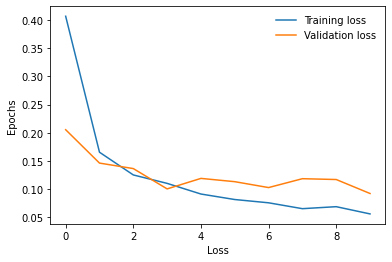

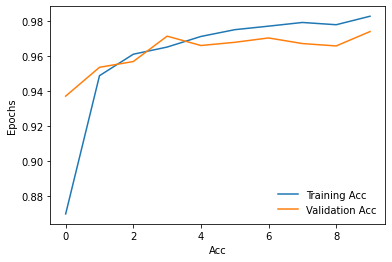

In [12]:
model = NN_model()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train(model,
      optimizer,
      criterion,
      train_loader,
      val_loader,
      epochs)

Test accuracy 0.97517800
Test accuracy : 0.9751780033111572


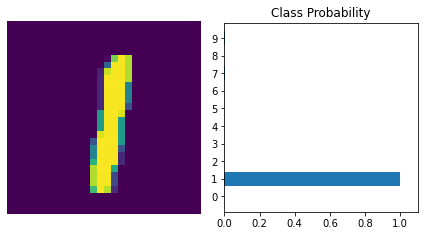

In [13]:
acc = test(model,
           test_loader)
accs.append(acc)
print("Test accuracy : {}".format(acc))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Epoch: 1/10, Train Loss: 88.05267911, Train Accuracy: 346.67968750, Val Loss: 6.07335730, Val Accuracy: 92.03125000
Saving the model state dictionary for Epoch: 1 with Val loss: 6.07335730

Epoch: 2/10, Train Loss: 19.97884733, Train Accuracy: 368.96093750, Val Loss: 5.97986222, Val Accuracy: 92.13802338
Saving the model state dictionary for Epoch: 2 with Val loss: 5.97986222

Epoch: 3/10, Train Loss: 14.19919767, Train Accuracy: 370.68750000, Val Loss: 4.26213501, Val Accuracy: 92.79427338
Saving the model state dictionary for Epoch: 3 with Val loss: 4.26213501

Epoch: 4/10, Train Loss: 10.49057408, Train Accuracy: 371.65625000, Val Loss: 4.36759668, Val Accuracy: 92.79166412

Epoch: 5/10, Train Loss: 9.42091733, Train Accuracy: 372.11718750, Val Loss: 4.35171265, Val Accuracy: 92.82812500

Epoch: 6/10, Train Loss: 6.93211900, Train Accuracy: 372.78906250, Val Loss: 3.44055662, Val Accuracy: 93.08593750
Saving the model state dictionary for Epoch: 6 with Val loss: 3.44055662

Epoch: 

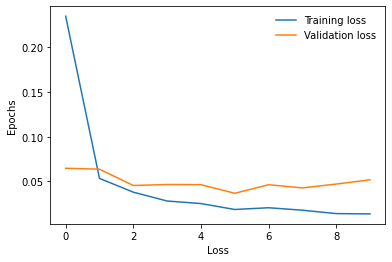

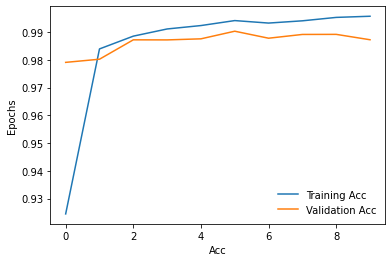

In [14]:
model = CNN_Model1()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train(model,
      optimizer,
      criterion,
      train_loader,
      val_loader,
      epochs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Test accuracy 0.99189085
Test accuracy : 0.9918908476829529


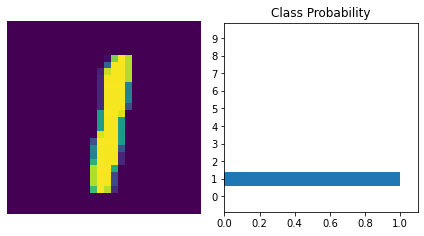

In [15]:
acc = test(model,
           test_loader)
accs.append(acc)
print("Test accuracy : {}".format(acc))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Epoch: 1/10, Train Loss: 119.06679268, Train Accuracy: 336.33593750, Val Loss: 10.99652423, Val Accuracy: 90.38541412
Saving the model state dictionary for Epoch: 1 with Val loss: 10.99652423

Epoch: 2/10, Train Loss: 28.37013183, Train Accuracy: 366.44531250, Val Loss: 5.82390242, Val Accuracy: 92.05208588
Saving the model state dictionary for Epoch: 2 with Val loss: 5.82390242

Epoch: 3/10, Train Loss: 20.52144147, Train Accuracy: 368.58593750, Val Loss: 4.66870104, Val Accuracy: 92.59114838
Saving the model state dictionary for Epoch: 3 with Val loss: 4.66870104

Epoch: 4/10, Train Loss: 15.61571269, Train Accuracy: 370.18750000, Val Loss: 4.19934151, Val Accuracy: 92.77343750
Saving the model state dictionary for Epoch: 4 with Val loss: 4.19934151

Epoch: 5/10, Train Loss: 11.98341786, Train Accuracy: 371.20312500, Val Loss: 3.34751918, Val Accuracy: 92.95833588
Saving the model state dictionary for Epoch: 5 with Val loss: 3.34751918

Epoch: 6/10, Train Loss: 10.04542837, Train Ac

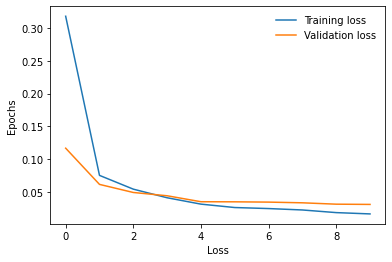

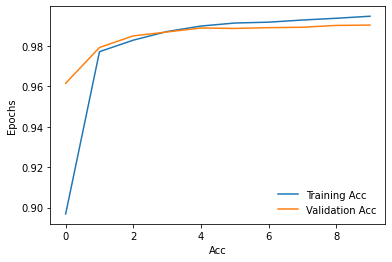

In [16]:
model = CNN_Model2()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train(model,
      optimizer,
      criterion,
      train_loader,
      val_loader,
      epochs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Test accuracy 0.99248415
Test accuracy : 0.9924841523170471


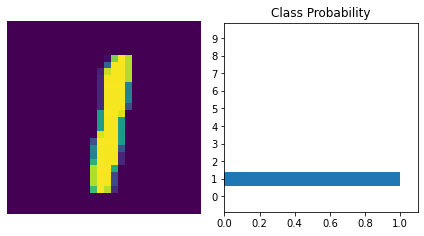

In [17]:
acc = test(model,
           test_loader)
accs.append(acc)
print("Test accuracy : {}".format(acc))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Epoch: 1/10, Train Loss: 87.35772164, Train Accuracy: 346.86718750, Val Loss: 5.76069541, Val Accuracy: 92.17968750
Saving the model state dictionary for Epoch: 1 with Val loss: 5.76069541

Epoch: 2/10, Train Loss: 21.01724309, Train Accuracy: 368.71875000, Val Loss: 5.84020003, Val Accuracy: 92.12500000

Epoch: 3/10, Train Loss: 15.72469179, Train Accuracy: 370.21875000, Val Loss: 5.04103448, Val Accuracy: 92.39583588
Saving the model state dictionary for Epoch: 3 with Val loss: 5.04103448

Epoch: 4/10, Train Loss: 12.10257860, Train Accuracy: 371.29687500, Val Loss: 4.17950245, Val Accuracy: 92.77083588
Saving the model state dictionary for Epoch: 4 with Val loss: 4.17950245

Epoch: 5/10, Train Loss: 11.23973124, Train Accuracy: 371.35156250, Val Loss: 3.76253474, Val Accuracy: 92.89583588
Saving the model state dictionary for Epoch: 5 with Val loss: 3.76253474

Epoch: 6/10, Train Loss: 9.69178738, Train Accuracy: 371.91406250, Val Loss: 4.49698782, Val Accuracy: 92.78906250

Epoch:

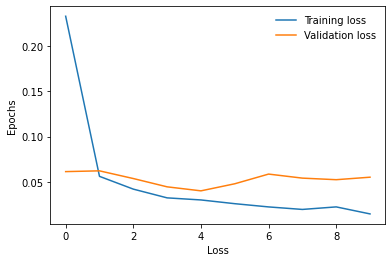

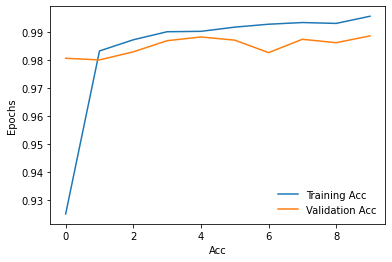

In [18]:
model = CNN_Model3()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train(model,
      optimizer,
      criterion,
      train_loader,
      val_loader,
      epochs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Test accuracy 0.98922074
Test accuracy : 0.9892207384109497


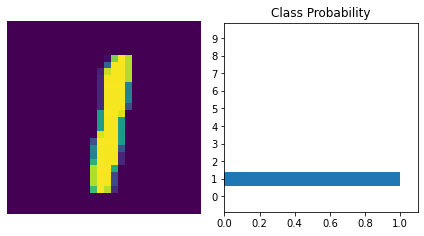

In [19]:
acc = test(model,
           test_loader)
accs.append(acc)
print("Test accuracy : {}".format(acc))

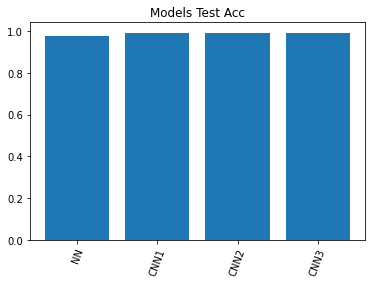

In [20]:
plt.title("Models Test Acc")
plt.xticks(rotation=70)
plt.bar(models, accs)
plt.show()

#Lenet5
![Texte alternatif…](https://www.researchgate.net/profile/Antoine_Mazieres2/publication/324937802/figure/fig12/AS:696472932724737@1543063495137/Architecture-du-reseau-convolutionnel-LeNet-5-pour-la-reconnaissance-de-caracteres-69.ppm)\
[Yann LeCun et al., 1998]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Epoch: 1/10, Train Loss: 89.20097871, Train Accuracy: 347.54687500, Val Loss: 7.02917692, Val Accuracy: 91.82031250
Saving the model state dictionary for Epoch: 1 with Val loss: 7.02917692

Epoch: 2/10, Train Loss: 23.68206248, Train Accuracy: 367.80468750, Val Loss: 5.30629299, Val Accuracy: 92.23697662
Saving the model state dictionary for Epoch: 2 with Val loss: 5.30629299

Epoch: 3/10, Train Loss: 17.62659873, Train Accuracy: 369.32031250, Val Loss: 5.20250858, Val Accuracy: 92.44791412
Saving the model state dictionary for Epoch: 3 with Val loss: 5.20250858

Epoch: 4/10, Train Loss: 14.24401382, Train Accuracy: 370.40625000, Val Loss: 3.92757607, Val Accuracy: 92.81250000
Saving the model state dictionary for Epoch: 4 with Val loss: 3.92757607

Epoch: 5/10, Train Loss: 11.52526258, Train Accuracy: 371.17968750, Val Loss: 4.55291858, Val Accuracy: 92.64583588

Epoch: 6/10, Train Loss: 10.46042320, Train Accuracy: 371.61718750, Val Loss: 3.90660112, Val Accuracy: 92.92447662
Saving

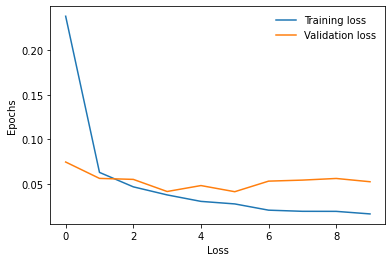

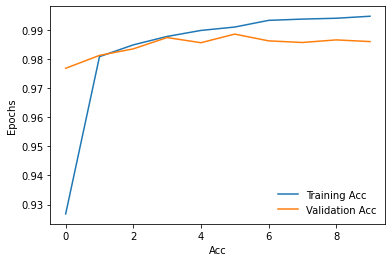

In [21]:
class LeNet5(torch.nn.Module):          
     
    def __init__(self):     
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)
        
        self.max_pool_1 = torch.nn.MaxPool2d(kernel_size=2)
        
        self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        
        self.max_pool_2 = torch.nn.MaxPool2d(kernel_size=2) 
        
        self.fc1 = torch.nn.Linear(16*5*5, 120)   
        self.fc2 = torch.nn.Linear(120, 84)       
        self.fc3 = torch.nn.Linear(84, 10)        
        
    def forward(self, x):
        x = F.relu(self.conv1(x))  
        x = self.max_pool_1(x) 
        
        x = F.relu(self.conv2(x))
        x = self.max_pool_2(x)
        
        x = x.view(-1, 16*5*5)
        
        x = F.relu(self.fc1(x))
        
        x = F.relu(self.fc2(x))
        
        x = F.log_softmax(self.fc3(x))
        
        return x

model = LeNet5()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train(model,
      optimizer,
      criterion,
      train_loader,
      val_loader,
      epochs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Test accuracy 0.98892403
Test accuracy : 0.9889240264892578


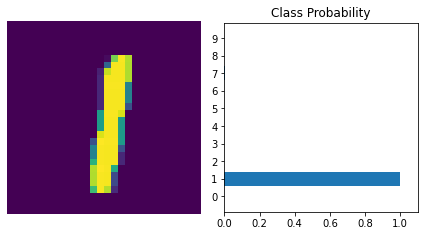

In [22]:
acc = test(model,
           test_loader)

print("Test accuracy : {}".format(acc))

#Batch Normalization

In [0]:

class CNN_Model4(torch.nn.Module):
    def __init__(self):
        super(CNN_Model4, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7*7*32, 10)
    
    def forward(self, x):
        x = self.layer1(x)
        
        x = self.layer2(x)
        
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        x = F.log_softmax(x)

        return x

train_transform = transforms.Compose([transforms.ToTensor()])
test_transform = transforms.Compose([transforms.ToTensor()])

train_data = datasets.MNIST('data/train', train=True,
                              download=True, transform=train_transform)
test_data = datasets.MNIST('data/test', train=False,
                             download=True, transform=test_transform)

train_loader, val_loader, test_loader = get_train_val_test_loader(train_data, test_data, batch_size)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Epoch: 1/10, Train Loss: 58.99443818, Train Accuracy: 356.65625000, Val Loss: 6.56177798, Val Accuracy: 91.95572662
Saving the model state dictionary for Epoch: 1 with Val loss: 6.56177798

Epoch: 2/10, Train Loss: 19.28622859, Train Accuracy: 369.00000000, Val Loss: 5.80783006, Val Accuracy: 92.34375000
Saving the model state dictionary for Epoch: 2 with Val loss: 5.80783006

Epoch: 3/10, Train Loss: 14.25917411, Train Accuracy: 370.54687500, Val Loss: 5.05185833, Val Accuracy: 92.50781250
Saving the model state dictionary for Epoch: 3 with Val loss: 5.05185833

Epoch: 4/10, Train Loss: 10.71433349, Train Accuracy: 371.61718750, Val Loss: 5.23971507, Val Accuracy: 92.38021088

Epoch: 5/10, Train Loss: 9.70466379, Train Accuracy: 371.80468750, Val Loss: 3.79800537, Val Accuracy: 92.86458588
Saving the model state dictionary for Epoch: 5 with Val loss: 3.79800537

Epoch: 6/10, Train Loss: 7.94023620, Train Accuracy: 372.42187500, Val Loss: 3.89697059, Val Accuracy: 92.82031250

Epoch: 

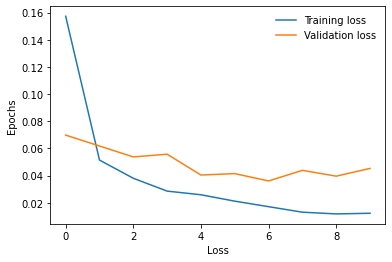

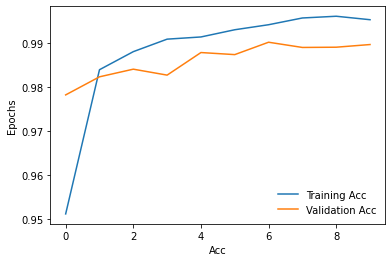

In [54]:
model = CNN_Model4()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train(model,
      optimizer,
      criterion,
      train_loader,
      val_loader,
      epochs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Test accuracy 0.99020964
Test accuracy : 0.9902096390724182


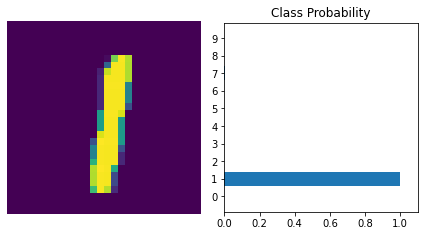

In [55]:
acc = test(model,
           test_loader)

print("Test accuracy : {}".format(acc))

#Data augmentation
- **RandomRotation(degrees) :** Rotate the image by angle.   
  - degrees : Range of degrees to select from. If degrees is a number instead of sequence like (min, max), the range of degrees will be (-degrees, +degrees).
- **RandomResizedCrop(size) :** Crop the given PIL Image to random size and aspect ratio.
  - size – expected output size of each edge
- **RandomHorizontalFlip(p) :** Horizontally flip the given PIL Image randomly with a given probability p.
- **Resize(size) :** Resize the input PIL Image to the given size.
  - size (sequence or int) – Desired output size. If size is a sequence like (h, w), output size will be matched to this. If size is an int, smaller edge of the image will be matched to this number. i.e, if height > width, then image will be rescaled to (size * height / width, size)
- **CenterCrop(size):** Crops the given PIL Image at the center.
- **ColorJitter(brightness=0, contrast=0, saturation=0, hue=0) :**
Randomly change the brightness, contrast and saturation of an image.

In [0]:
train_transform = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize([0.5,],[0.5,])])

train_data = datasets.FashionMNIST('data/training', train=True,
                              download=True, transform=train_transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=60, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


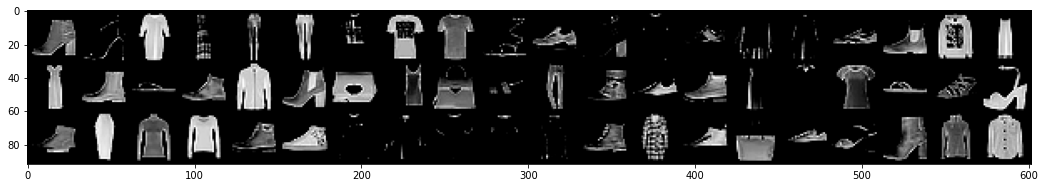

In [57]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

grid = torchvision.utils.make_grid(images, nrow = 20, padding = 2)
plt.figure(figsize = (18, 18))  
plt.imshow(np.transpose(grid, (1, 2, 0))) 

In [0]:
train_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.5],[0.5])])

train_data = datasets.FashionMNIST('data/training', train=True,
                              download=True, transform=train_transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=60, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


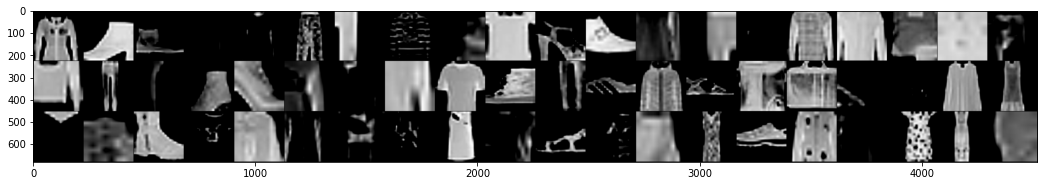

In [61]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

grid = torchvision.utils.make_grid(images, nrow = 20, padding = 2)
plt.figure(figsize = (18, 18))  
plt.imshow(np.transpose(grid, (1, 2, 0))) 

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


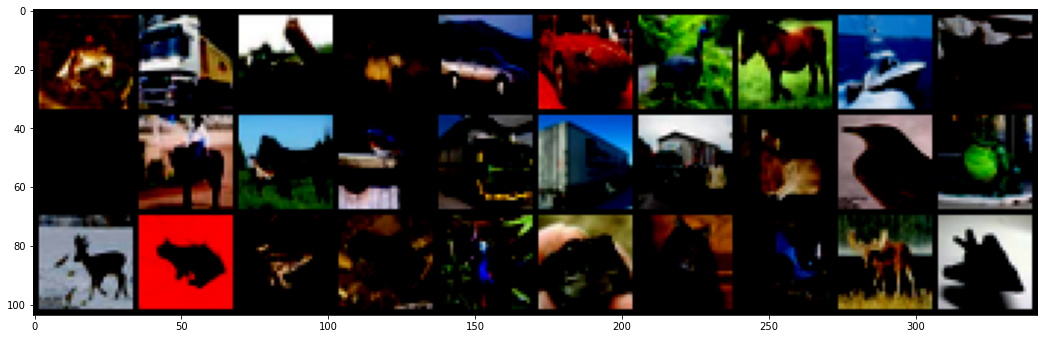

In [73]:
train_transform = transforms.Compose([transforms.ToTensor(),
                          transforms.Normalize([0.5,], [0.5,])
])


cifar10_train = datasets.CIFAR10(root = "/data", train=True, download = True, transform=train_transform)
train_loader = torch.utils.data.DataLoader(cifar10_train, batch_size=30)

dataiter = iter(train_loader)
images, labels = dataiter.next()

grid = torchvision.utils.make_grid(images, nrow = 10, padding = 2)
plt.figure(figsize = (18, 18))  
plt.imshow(np.transpose(grid, (1, 2, 0))) 

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


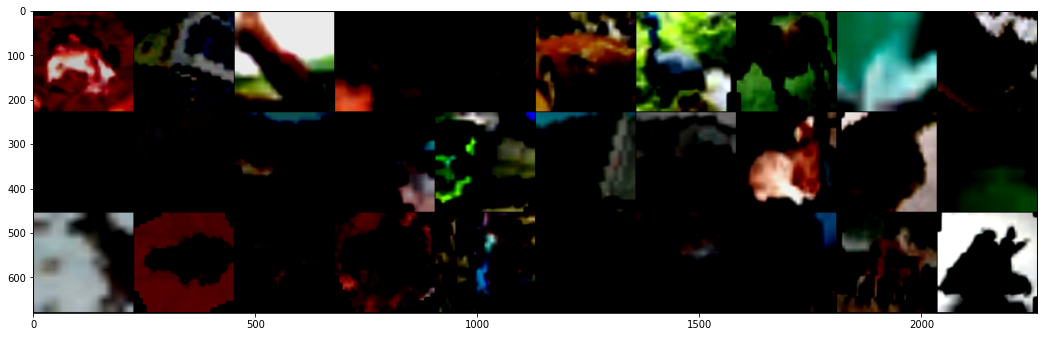

In [75]:
train_transform = transforms.Compose([transforms.RandomRotation(30),
                          transforms.RandomResizedCrop(224),
                          transforms.RandomHorizontalFlip(),
                          transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
                          transforms.ToTensor(),
                          transforms.Normalize([0.5,], [0.5,])
])


cifar10_train = datasets.CIFAR10(root = "/data", train=True, download = True, transform=train_transform)
train_loader = torch.utils.data.DataLoader(cifar10_train, batch_size=30)

dataiter = iter(train_loader)
images, labels = dataiter.next()

grid = torchvision.utils.make_grid(images, nrow = 10, padding = 2)
plt.figure(figsize = (18, 18))  
plt.imshow(np.transpose(grid, (1, 2, 0))) 